In [2]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd

In [3]:
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1,noise = 60, random_state=13)

In [4]:
X.shape
y.shape

(4,)

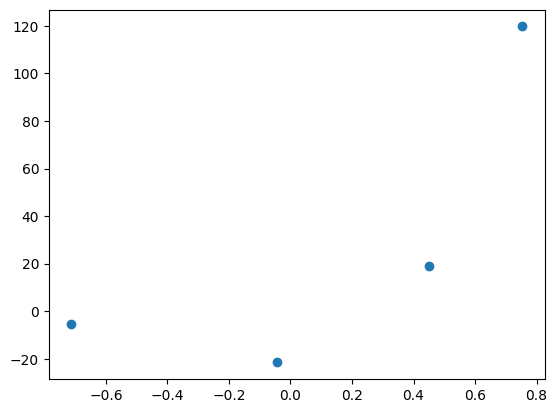

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [6]:
# use OLS method
from sklearn.linear_model import LinearRegression
linear = LinearRegression()


In [7]:
linear.fit(X,y)

LinearRegression()

In [8]:
linear.coef_

array([73.98903908])

In [9]:
linear.intercept_

np.float64(19.619724632349467)

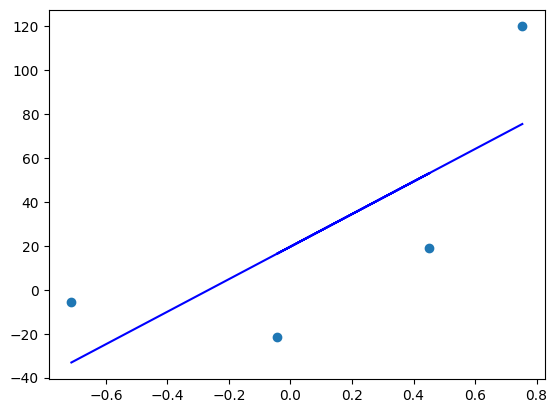

In [10]:
plt.scatter(X,y)
plt.plot(X, linear.predict(X), color='blue')

In [11]:
# now using gradient descent
# assume slope is constant = 73.98
# initial value of b = 0
y_pred = (73.98*X)+0

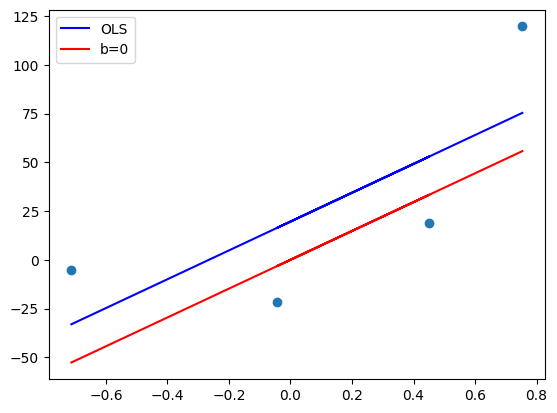

In [12]:
plt.scatter(X,y)
plt.plot()
plt.plot(X, linear.predict(X), color='blue', label='OLS')
plt.plot(X, y_pred, color='red', label='b=0')
plt.legend()
plt.show()

In [13]:
# we need to optimise this by applying gradient descent so that red line moves towards blue line
b = 0
m=73.98
loss = -2 * np.sum(y-X.ravel()-b)
loss

np.float64(-222.45596770175734)

In [14]:
lr = 0.1
b_new = b - lr*loss
b_new
y_pred_new = 73.98*X + b_new

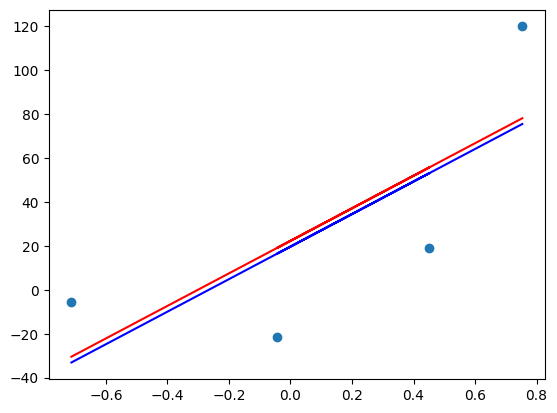

In [15]:
plt.scatter(X,y)
plt.plot(X, linear.predict(X), color = 'blue', label='ols')
plt.plot(X, y_pred_new, color='red', label='gradient')

In [16]:
# thus optimized manually using gradient descent.
# continue this for more iterations (change value of b)

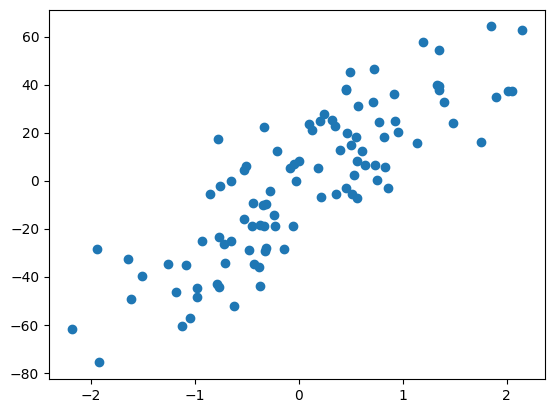

In [19]:
# adjusting both m and b:
# steps of gradient descent:

"""
1. random values of m and b
2. epochs =200, lr = 0.01
3. for i in epochs:
 b = b-lr*slope
 w = w-lr*slope
""" 
X, y = make_regression(n_samples = 100, n_features = 1, n_informative = 1, n_targets = 1, noise = 20, random_state=13)
plt.scatter(X,y)




In [20]:
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_) #w
print(lr.intercept_) #b

[27.82809103]
-2.29474455867698


In [41]:
class GradientDescent:
    def __init__(self,lr, epochs):
        self.w = 100
        self.b = -120
        self.lr = lr
        self.epochs = epochs
    def fit(self, X,y):
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.w * X.ravel() - self.b)
            loss_slope_w = -2 * np.sum((y- self.w*X.ravel() - self.b) * X.ravel())

            self.b = self.b - (self.lr * loss_slope_b)
            self.w = self.w - (self.lr * loss_slope_w)
        print(self.w, self.b)
    def predict(self, X):
        return self.w * X + self.b


In [50]:
gd = GradientDescent(0.001, 100)
gd.fit(X,y)

27.828091872608653 -2.2947448944994893


In [51]:
y_pred = gd.predict(X)
y_pred[:5]

array([[-22.11921769],
       [-14.45967436],
       [-14.92180785],
       [ 24.22071289],
       [  4.32438488]])

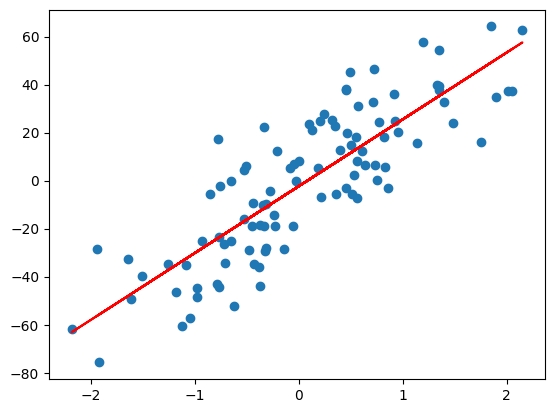

In [52]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')